In [431]:
import sys
import traceback
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import scipy.stats as stats
from metpy.cbook import get_test_data
import netCDF4 as nc  

import pyOptimalEstimation as pyOE

%matplotlib inline
sns.set(style='ticks', palette='deep')


sys.path.append('lib')
import nonScatMWRadTran
import supporting_routines

In [432]:
prior = xr.open_dataset("E:/SAMEER/pyOptimalEstimation_examples-master/pyOptimalEstimation_examples-master/data/GUWAHATI_IGRA.nc", engine='netcdf4')
prior

<xarray.Dataset>
Dimensions:   (time: 11826, height: 30)
Coordinates:
  * time      (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T15:00:00
  * height    (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 ...

In [433]:
prior.bar_pres

<xarray.DataArray 'bar_pres' (time: 11826, height: 30)>
[354780 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T15:00:00
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  Pressure in Pa
    units:      Pa

In [434]:


import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
# table1 = pd.DataFrame({'time': prior['time']})
table1= pd.DataFrame (prior.bar_pres)

# Display the table

print(table1)
table1

             0         1         2         3        4        5        6   \
0      101000.0  100000.0   93200.0   92500.0  85000.0  75800.0  70000.0   
1      100800.0  100000.0   96700.0   92500.0  85000.0  82000.0  76100.0   
2      100000.0   96000.0   92500.0   85000.0  79500.0  70000.0  63400.0   
3      100800.0  100000.0   94100.0   92500.0  85000.0  81100.0  77500.0   
4      100800.0   92800.0   92500.0   91200.0  85000.0  82400.0  75600.0   
...         ...       ...       ...       ...      ...      ...      ...   
11821  101200.0  100000.0   99900.0   97900.0  96700.0  92500.0  85000.0   
11822  100900.0  100500.0  100300.0  100000.0  99400.0  92500.0  91700.0   
11823  101000.0  100800.0  100100.0  100000.0  99500.0  98200.0  97800.0   
11824  100800.0  100000.0   92500.0   85000.0  70000.0  50000.0  40000.0   
11825  101000.0  100000.0   97900.0   94400.0  92500.0  89600.0  85000.0   

            7        8        9   ...       20       21       22       23  \
0      656

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,101000.0,100000.0,93200.0,92500.0,85000.0,75800.0,70000.0,65600.0,64300.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100800.0,100000.0,96700.0,92500.0,85000.0,82000.0,76100.0,74800.0,72400.0,70000.0,...,30200.0,30000.0,25000.0,24100.0,20000.0,15000.0,NaN,NaN,NaN,NaN
2,100000.0,96000.0,92500.0,85000.0,79500.0,70000.0,63400.0,60000.0,50000.0,46000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100800.0,100000.0,94100.0,92500.0,85000.0,81100.0,77500.0,70000.0,66900.0,65800.0,...,15300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100800.0,92800.0,92500.0,91200.0,85000.0,82400.0,75600.0,70000.0,67000.0,60000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11821,101200.0,100000.0,99900.0,97900.0,96700.0,92500.0,85000.0,81300.0,77600.0,71100.0,...,50000.0,49000.0,47000.0,45000.0,43400.0,40100.0,40000.0,37400.0,35800.0,34300.0
11822,100900.0,100500.0,100300.0,100000.0,99400.0,92500.0,91700.0,86200.0,85500.0,85000.0,...,45300.0,40800.0,40000.0,38900.0,37200.0,35700.0,34300.0,32800.0,31700.0,30000.0
11823,101000.0,100800.0,100100.0,100000.0,99500.0,98200.0,97800.0,95300.0,92500.0,90900.0,...,50000.0,49600.0,47300.0,44900.0,43900.0,42700.0,41400.0,40000.0,39500.0,37700.0
11824,100800.0,100000.0,92500.0,85000.0,70000.0,50000.0,40000.0,30000.0,25000.0,20000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


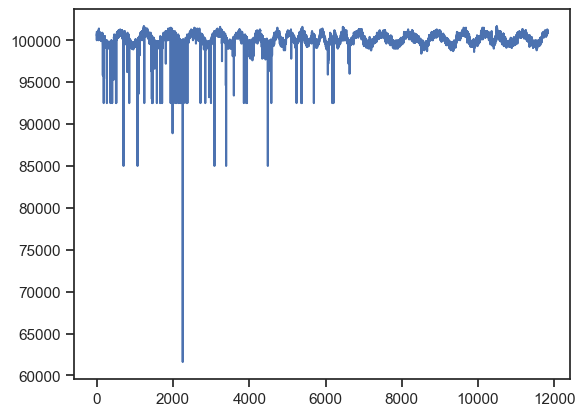

In [435]:
plt.plot(table1[0])

In [436]:
prior.q

<xarray.DataArray 'q' (time: 11826, height: 30)>
[354780 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T15:00:00
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [437]:
prior.temp

<xarray.DataArray 'temp' (time: 11826, height: 30)>
[354780 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-05-01T15:00:00
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  temperature
    units:      K

In [438]:
import pandas as pd

# Specify the path to your CSV file with escaped backslashes
csv_file_path = "C:\\Users\\angsh\\Downloads\\GUWAHATI_IGRA_DATES.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


              Test_time
0      01-01-2000 00:00
1      01-01-2000 12:00
2      02-01-2000 00:00
3      02-01-2000 12:00
4      03-01-2000 00:00
...                 ...
11821  29-12-2023 00:00
11822  29-12-2023 12:00
11823  30-12-2023 00:00
11824  30-12-2023 12:00
11825  31-12-2023 00:00

[11826 rows x 1 columns]


In [439]:
import pandas as pd
import xarray as xr

# Read the CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\angsh\\Downloads\\GUWAHATI_IGRA_DATES.csv"
df = pd.read_csv(csv_file_path)

# Convert the 'Test_time' column to datetime64
df['Test_time'] = pd.to_datetime(df['Test_time'], format='%d-%m-%Y %H:%M')

# Assuming you have already loaded your data into prior
# prior: xarray.Dataset

# Make sure that df is sorted by 'Test_time'
df = df.sort_values(by='Test_time')

# If 'time' is already a coordinate in prior and you want to replace its values,
# you can use the .assign_coords() method instead of direct assignment:
prior = prior.assign_coords(time=df['Test_time'])
# prior = prior.assign_coords(time=df.index)
prior = prior.assign_coords(height=prior.height)


# Now the 'time' coordinate in prior has been replaced with the 'Test_time' values from df
prior

<xarray.Dataset>
Dimensions:   (time: 11826, height: 30)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 ... 2023-12-31
  * height    (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 1.01e+05 1e+05 9.32e+04 ... 3.13e+04 3e+04

In [440]:
import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
table = pd.DataFrame({'time': prior['time']})

# Display the table

print(table)
table

                     time
0     2000-01-01 00:00:00
1     2000-01-01 12:00:00
2     2000-01-02 00:00:00
3     2000-01-02 12:00:00
4     2000-01-03 00:00:00
...                   ...
11821 2023-12-29 00:00:00
11822 2023-12-29 12:00:00
11823 2023-12-30 00:00:00
11824 2023-12-30 12:00:00
11825 2023-12-31 00:00:00

[11826 rows x 1 columns]


,time
0,2000-01-01 00:00:00
1,2000-01-01 12:00:00
2,2000-01-02 00:00:00
3,2000-01-02 12:00:00
4,2000-01-03 00:00:00
...,...
11821,2023-12-29 00:00:00
11822,2023-12-29 12:00:00
11823,2023-12-30 00:00:00
11824,2023-12-30 12:00:00


In [441]:
prior.time

<xarray.DataArray 'time' (time: 11826)>
array(['2000-01-01T00:00:00.000000000', '2000-01-01T12:00:00.000000000',
       '2000-01-02T00:00:00.000000000', ..., '2023-12-30T00:00:00.000000000',
       '2023-12-30T12:00:00.000000000', '2023-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-31

In [442]:
prior.q

<xarray.DataArray 'q' (time: 11826, height: 30)>
[354780 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-31
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [443]:
# import pandas as pd

# # Assuming 'table' is your DataFrame with a column named 'time'

# # Step 1: Get unique dates
# unique_dates = table['time'].unique()

# # Step 2: Randomly select 5 unique dates
# random_dates = pd.Series(unique_dates).sample(n=8, random_state=42)  # Set random_state for reproducibility

# print(random_dates)


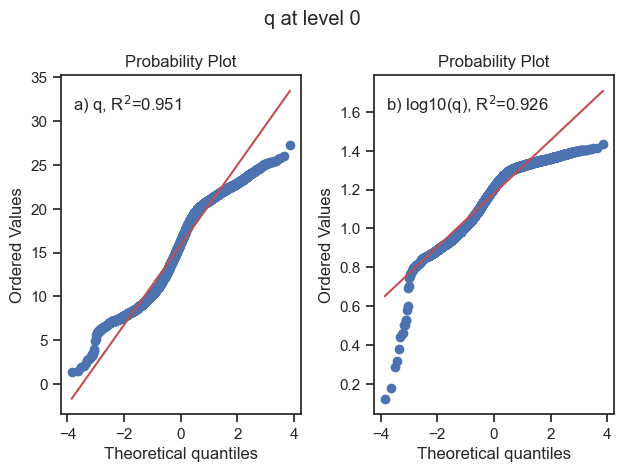

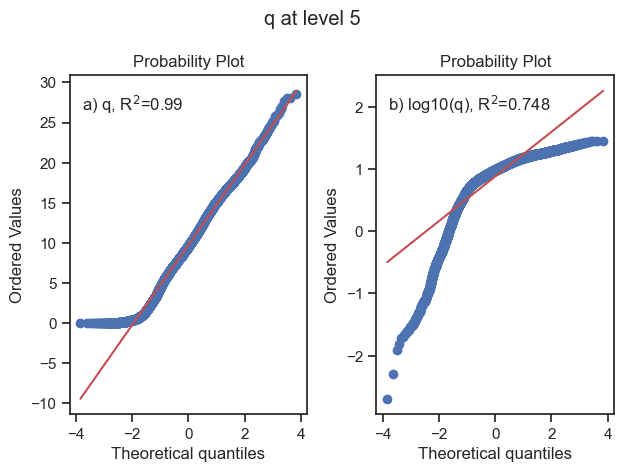

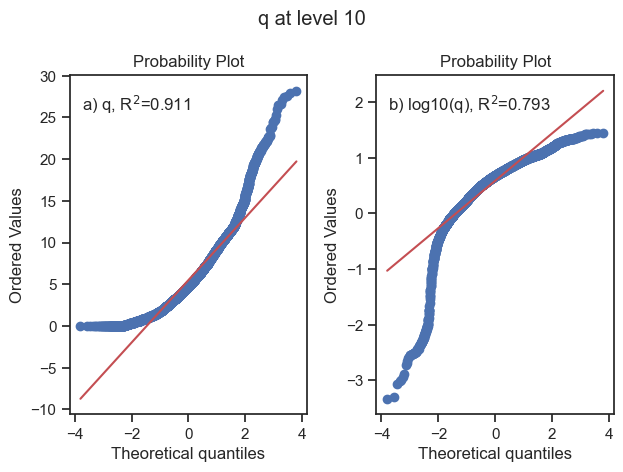

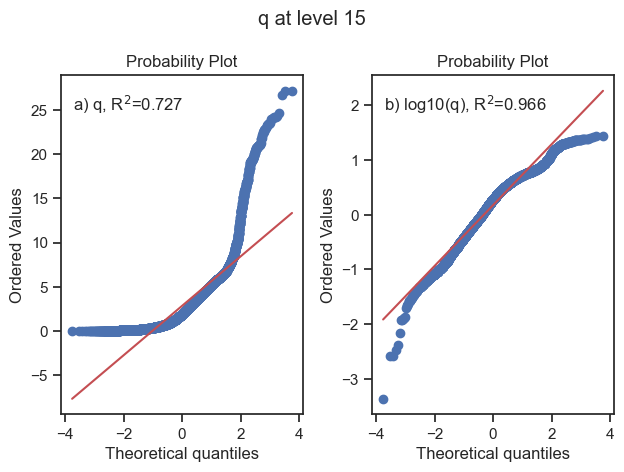

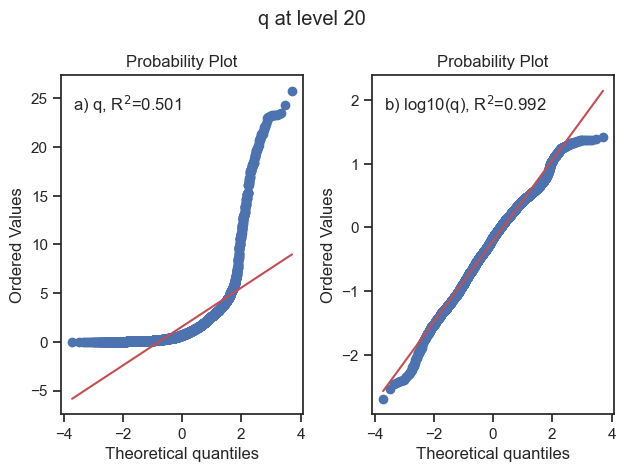

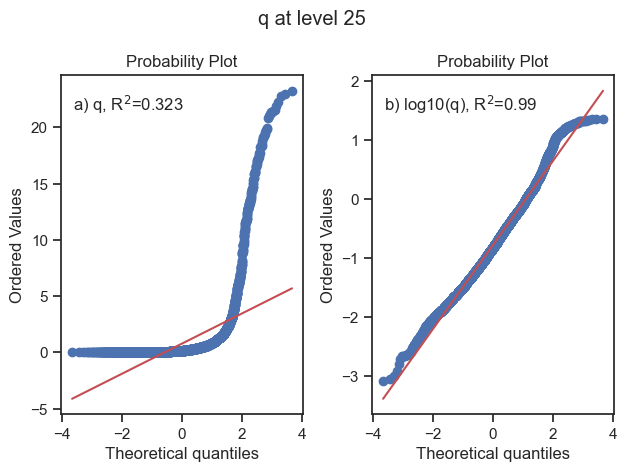

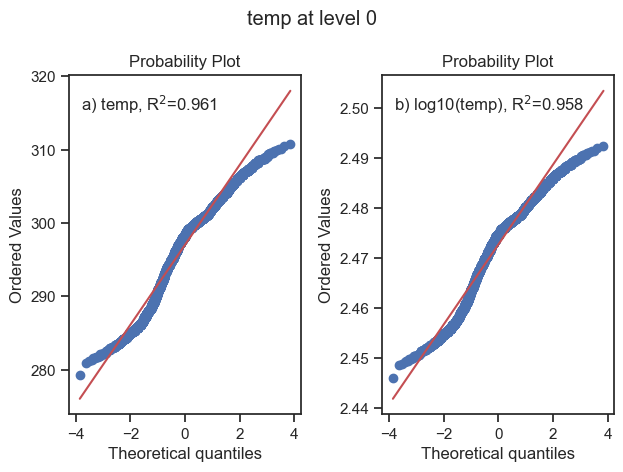

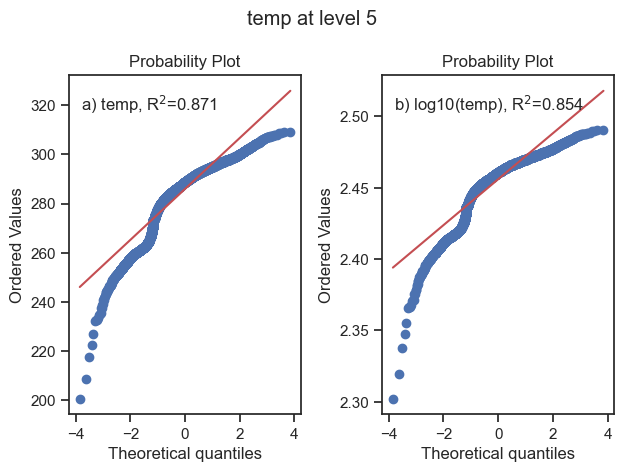

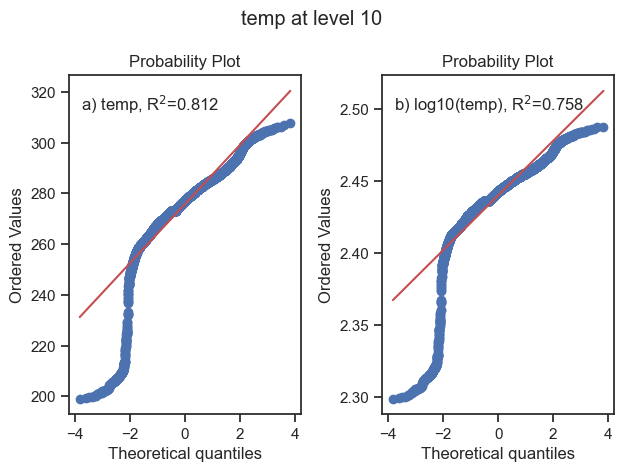

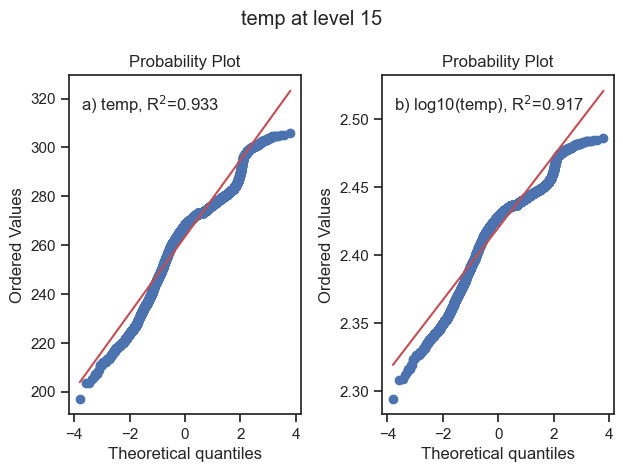

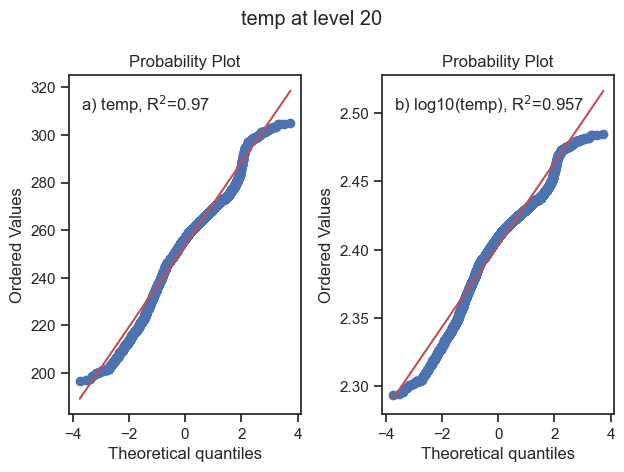

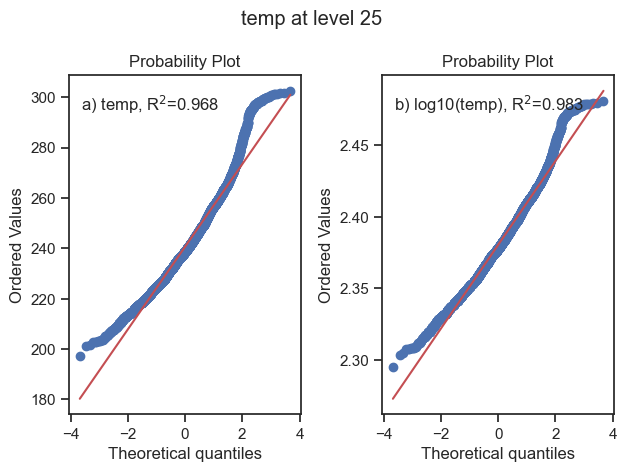

In [444]:
for var in ['q', 'temp']:
    for h in range(0, 30, 5):
        fig, (ax, ax1) = plt.subplots(ncols=2)
        plt.suptitle('%s at level %i' % (var,h))
        (osm, osr), (slope, intercept, r) = stats.probplot(
            prior[var].isel(height=h).dropna('time').values,
            dist="norm",
            plot=ax,
            fit=True,
            rvalue=False)
        ax.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('a', var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)

        (osm, osr), (slope, intercept, r) = stats.probplot(
            np.log10(prior[var].isel(height=h).dropna('time').values),
            dist="norm",
            plot=ax1,
            fit=True,
            rvalue=False)
        ax1.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('b', 'log10(%s)'%var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax1.transAxes)
        fig.tight_layout()

In [445]:
import numpy as np
import pandas as pd

# Assuming 'prior' is your pandas DataFrame
prior['q'] = np.log10(prior['q'])



In [446]:
prior['q']

<xarray.DataArray 'q' (time: 11826, height: 30)>
array([[ 0.85988164,  0.85542723,  0.88625595, ...,         nan,
                nan,         nan],
       [ 1.00493203,  1.00841897,  1.03157677, ...,         nan,
                nan,         nan],
       [ 0.86719835,  0.93174844,  0.85996049, ...,         nan,
                nan,         nan],
       ...,
       [ 0.9841452 ,  1.05824125,  1.07521619, ..., -1.09070162,
        -1.07509116, -0.9843688 ],
       [ 1.11926883,  0.96598628,  0.95963415, ...,         nan,
                nan,         nan],
       [ 1.0039861 ,  1.0672869 ,  1.09054064, ..., -0.71846742,
        -0.87367393, -0.87514448]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T12:00:00 ... 2023-12-31
  * height   (height) float64 0.0 188.6 508.0 ... 1.042e+04 1.065e+04 1.068e+04
Attributes:
    long_name:  Relative humidity
    units:      %

In [447]:
profileTT = np.array([
    '2017-03-28T12:00:00.000000000','2005-06-14T00:00:00.000000000',
    '2019-08-20T00:00:00.000000000','2011-05-03T12:00:00.000000000'
],dtype='datetime64[ns]')
profiles = prior.sel(time=profileTT)
prior = prior.drop_sel(time=profileTT)
nLev = len(prior.height)
nLev

# '2005-01-21T12:00:00.000000000',
#     '2015-04-12T00:00:00.000000000',
#     '2020-07-03T12:00:00.000000000',
#     '2023-09-27T00:00:00.000000000'



30

In [448]:
priors = {'all': prior}

seasons = [
    'DJF',
    'MAM',
    'JJA',
    'SON',
]
months = (
    [12, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
)
for season, month in zip(seasons, months):
    priors[season] = prior.where(
        np.in1d(prior['time.month'], month)[:, np.newaxis]).dropna(
            'time', how='all')

In [449]:
# prior_qts = {}
# for season in priors.keys():
#     prior_q = priors[season]['q'].to_pandas()
#     prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
#     prior_t = priors[season]['temp'].to_pandas()
#     prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
#     prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
#     prior_qts[season] = prior_qts[season].reindex(
#         sorted(prior_qts[season].columns), axis=1)

# prior_qts

prior_qts = {}
for season in priors.keys():
    prior_q = priors[season]['q'].to_pandas()
    prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
    prior_t = priors[season]['temp'].to_pandas()
    prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
    prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
    prior_qts[season] = prior_qts[season].reindex(
        sorted(prior_qts[season].columns), axis=1)

prior_qts

{'all':                       00000_q  00000_t   00188_q  00188_t   00508_q  00508_t  \
 time                                                                           
 2000-01-01 00:00:00  0.859882   282.95  0.855427   283.75  0.886256   288.15   
 2000-01-01 12:00:00  1.004932   290.95  1.008419   291.15  1.031577   291.95   
 2000-01-02 00:00:00  0.867198   284.75  0.931748   288.75  0.859960   286.15   
 2000-01-02 12:00:00  0.922143   293.55  0.902425   292.75  0.940486   289.15   
 2000-01-03 00:00:00  0.854868   282.75  0.864468   285.95  0.830197   286.15   
 ...                       ...      ...       ...      ...       ...      ...   
 2023-12-29 00:00:00  0.983281   287.55  1.053364   290.55  1.053802   290.55   
 2023-12-29 12:00:00  1.124297   296.75  1.172356   297.75  1.148811   298.55   
 2023-12-30 00:00:00  0.984145   287.55  1.058241   290.15  1.075216   290.75   
 2023-12-30 12:00:00  1.119269   297.55  0.965986   298.95  0.959634   292.55   
 2023-12-31 00:00:00 

In [450]:
x_cov = []
x_mean = []

for season in ['all'] + seasons:

    x_cov1 = prior_qts[season].cov().rename_axis('state', axis=0).rename_axis('stateT', axis=1)
    x_mean1 = prior_qts[season].mean().rename_axis('state', axis=0)

    x_cov.append(xr.DataArray(x_cov1))
    x_mean.append(xr.DataArray(x_mean1))

x_cov = xr.concat(x_cov, dim='season')
x_mean = xr.concat(x_mean, dim='season')

x_cov['season'] = ['all'] + seasons
x_mean['season'] = ['all'] + seasons

In [451]:
for season in x_cov.season:
    assert np.linalg.matrix_rank(x_cov.sel(season=season).to_pandas()) ==  x_cov.shape[-1]

Text(0, 0.5, 'Height [m]')

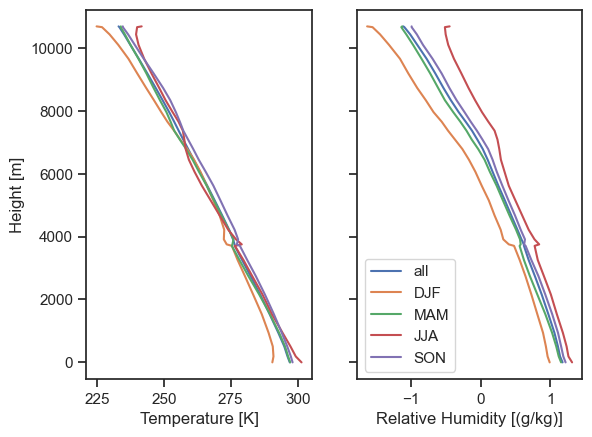

In [452]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for season in ['all'] + seasons:
    t, q = supporting_routines.splitTQ(x_mean.sel(season=season).to_pandas())
    ax1.plot(t, t.index, label=season)
    ax2.plot(q, q.index, label=season)

ax2.legend()
ax1.set_xlabel('Temperature [K]')
ax2.set_xlabel('Relative Humidity [(g/kg)]')
ax1.set_ylabel('Height [m]')

Text(0.5, 1.0, '$\\mathbb{S}_{a}$ Humidity')

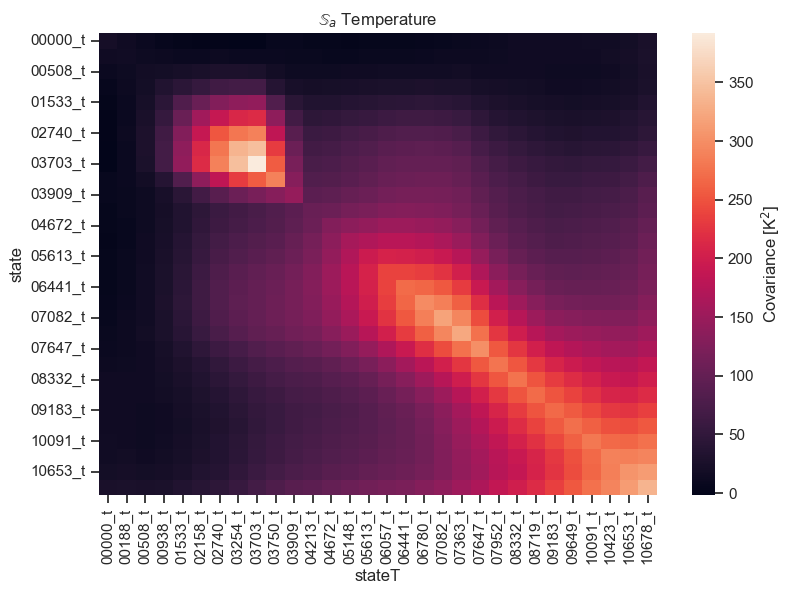

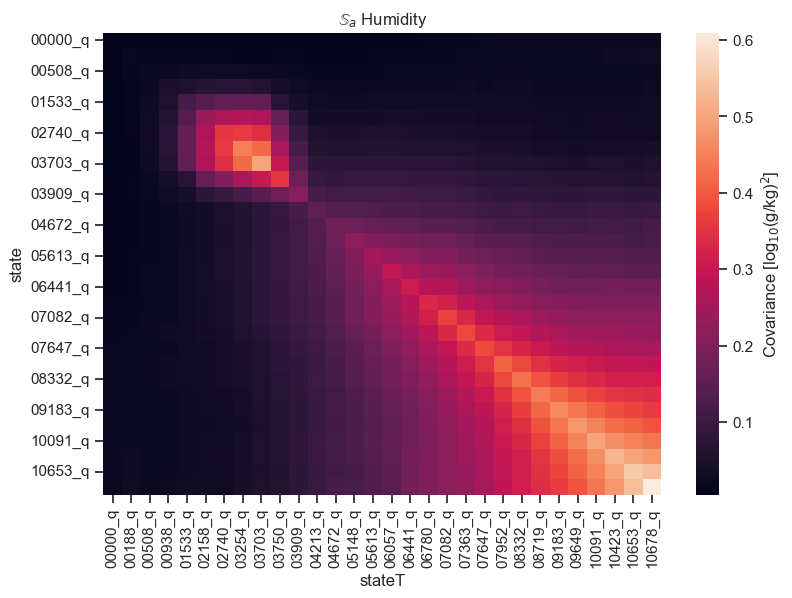

In [453]:
S_a = x_cov.sel(season='MAM').to_pandas()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Temperature')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Humidity')

In [454]:
height = priors['all'].height

pressure = []
for k in ['all'] + seasons:
    pressure.append(priors[k].bar_pres.mean('time'))
pressure = xr.concat(pressure, dim='season')
pressure['season'] = ['all'] + seasons
pressure = pressure.to_pandas()
pressure

height,0.000000,188.645435,508.012873,938.674662,1533.684421,2158.056688,2740.022060,3254.597677,3703.183007,3750.661827,...,7647.042982,7952.135234,8332.292435,8719.182545,9183.720944,9649.467170,10091.314936,10423.866535,10653.872794,10678.708233
season,,,,,,,,,,,,,,,,,,,,,
all,100123.615294,98046.282040,94592.085661,90231.098491,84755.615110,79461.035959,74858.583506,70945.023944,67569.352708,66401.171004,...,40790.283828,39083.939564,37095.538597,35161.253473,33013.162558,30989.832232,29189.372599,27930.731205,27156.714952,27263.437797
DJF,100747.052197,99865.039429,96959.172932,93445.054532,88794.155354,83680.402583,79538.688650,75941.099071,72886.528700,70045.874457,...,42037.526652,39805.652911,37415.902323,35050.750939,32493.259162,30063.636364,27553.012912,25498.127925,23864.784946,22896.342857
MAM,100071.745236,98174.055500,94544.734203,90152.899765,84596.530818,79012.983051,74293.574846,70397.474922,67125.789474,66310.557844,...,40977.112299,39561.983945,37615.830816,35838.658147,33825.514950,31772.075209,29858.976261,28567.187500,27828.599034,28061.179361
JJA,99470.877136,95579.645161,91812.943835,86405.981248,79959.238777,74686.791216,69805.292756,65684.219325,61945.997286,62421.791494,...,37795.819209,36179.857820,34430.129390,32932.010410,31318.150685,29965.957447,29134.304746,28970.658683,29650.190597,31112.521151
SON,100292.859472,98835.670036,95393.050571,91379.791055,86228.702190,81029.776756,76414.958814,72405.167274,68979.405874,66947.292170,...,42058.377853,40517.770930,38671.728595,36591.394826,34207.176196,31982.672361,30137.270341,28892.103321,28051.894273,28283.959044


In [455]:
import numpy as np
import pandas as pd

#Assuming profiles is an xarray Dataset or DataArray
profiles_t = profiles['temp'].to_pandas()
profiles_t
# # Proceed with the rest of the code as before
profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
profiles_q = profiles['q'].to_pandas()
profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]
x_truths = pd.concat((profiles_t, profiles_q), axis=1)
x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
x_truths.columns.name = 'state'
x_truths.index.name = 'time'

# assert np.all(np.isfinite(x_truths))
x_truths



# import numpy as np
# import pandas as pd

# profiles_t = profiles['temp'].to_pandas()
# profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
# profiles_q = profiles['q'].to_pandas()
# profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]

# x_truths = pd.concat((profiles_t, profiles_q), axis=1)
# x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
# # x_truths = np.nan_to_num(x_truths) 
# x_truths
# x_truths.columns.name = 'state'
# x_truths.index.name = 'time'

# # Replace missing values with mean
# x_truths_filled = x_truths.fillna(x_truths.mean())

# # Check for infinite values
# infinite_values = not np.all(np.isfinite(x_truths_filled.values))
# print("Infinite Values Present after filling missing values:", infinite_values)

# # Ensure all values are finite
# assert np.all(np.isfinite(x_truths_filled)), "Not all values are finite after filling missing values"

# # Now x_truths_filled can be used without any infinite or missing values

# # assert np.all(np.isfinite(x_truths))
# x_truths

state,00000_t,00188_t,00508_t,00938_t,01533_t,02158_t,02740_t,03254_t,03703_t,03750_t,...,07647_q,07952_q,08332_q,08719_q,09183_q,09649_q,10091_q,10423_q,10653_q,10678_q
time,,,,,,,,,,,,,,,,,,,,,
2005-06-14 00:00:00,299.95,298.35,295.75,295.75,291.15,285.35,284.15,279.75,277.75,278.35,...,0.356436,0.426083,0.128361,0.291397,0.174148,-0.059715,0.078333,0.059649,-0.129590,-0.173225
2011-05-03 12:00:00,298.75,298.55,295.35,294.95,293.75,292.95,289.75,287.15,285.35,286.15,...,0.258058,0.209953,0.018673,-0.039021,-0.163694,-0.250141,-0.244736,-0.289275,-0.383915,-0.212659
2017-03-28 12:00:00,300.95,299.75,298.75,298.75,295.95,294.55,294.55,290.35,290.75,289.15,...,-0.349608,-0.632079,-0.735141,-0.915144,-1.072982,-1.345010,-1.343869,-1.474991,-1.656775,-1.731096
2019-08-20 00:00:00,300.15,297.75,297.95,297.95,293.15,292.55,289.75,284.35,284.35,282.35,...,0.298417,0.062332,0.204844,0.155364,-0.328799,-0.737461,-0.279497,-0.330764,-0.342859,-0.784539


In [456]:
# x_truths_filled = x_truths.interpolate(method='linear', axis=1, limit_direction='both')  # Interpolate NaN values along columns using linear interpolation
# # print(x_truths_filled)
# x_truths=x_truths_filled
# x_truths

assert np.all(np.isfinite(x_truths))
x_truths

state,00000_t,00188_t,00508_t,00938_t,01533_t,02158_t,02740_t,03254_t,03703_t,03750_t,...,07647_q,07952_q,08332_q,08719_q,09183_q,09649_q,10091_q,10423_q,10653_q,10678_q
time,,,,,,,,,,,,,,,,,,,,,
2005-06-14 00:00:00,299.95,298.35,295.75,295.75,291.15,285.35,284.15,279.75,277.75,278.35,...,0.356436,0.426083,0.128361,0.291397,0.174148,-0.059715,0.078333,0.059649,-0.129590,-0.173225
2011-05-03 12:00:00,298.75,298.55,295.35,294.95,293.75,292.95,289.75,287.15,285.35,286.15,...,0.258058,0.209953,0.018673,-0.039021,-0.163694,-0.250141,-0.244736,-0.289275,-0.383915,-0.212659
2017-03-28 12:00:00,300.95,299.75,298.75,298.75,295.95,294.55,294.55,290.35,290.75,289.15,...,-0.349608,-0.632079,-0.735141,-0.915144,-1.072982,-1.345010,-1.343869,-1.474991,-1.656775,-1.731096
2019-08-20 00:00:00,300.15,297.75,297.95,297.95,293.15,292.55,289.75,284.35,284.35,282.35,...,0.298417,0.062332,0.204844,0.155364,-0.328799,-0.737461,-0.279497,-0.330764,-0.342859,-0.784539


In [457]:
# def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):
#     # Convert X to a pandas DataFrame or Series object if it's a numpy array
#     if isinstance(X, np.ndarray):
#         X = pd.Series(X, index=[f'{i}_t' for i in pd.date_range(start='2015-09-21T12:00:00.000000000', periods=len(X), freq='D')])

#     # X contains T and Q, lets split the vector
#     t_index, q_index = supporting_routines.splitTQ(X)
#     # humidity is in log10 scale, convert to linear in kg/kg
#     temperature, humidity = supporting_routines.splitTQ(X)
#     humidity = (10**humidity) / 1000.  # Assign humidity before using it
#     # Height in meters comes from index of the temperature (or humidity) vector
#     heights = temperature.index
#     assert np.all(np.diff(heights) > 0)

#     # get absolute humidity from specific humidity
#     abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
#     # run the forward operator
#     TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
#         heights,  # [m]  
#         temperature,  # [K]
#         pressure,  # [Pa]
#         abs_humidity,  # [kgm^-3]
#         zenithAngle,  # zenith angle of observation in deg.
#         frequencies,  # frequency vector in GHz
#     )
#     return TB


In [458]:
def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):

    # X contains T and Q, lets split the vector
    temperature, humidity = supporting_routines.splitTQ(X)
    # humdity is in log10 scale, convert to linear in kg/kg
#     humidity = (10**humidity) / 1000.
    # Height in meters comes from index of the temperature (or humidty) vector
    heights = temperature.index
    assert np.all(np.diff(heights) > 0)

    # get absolute humidty from specific humdity
    abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
    # run the forward operator
    TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
        heights,  # [m]  
        temperature,  # [K]
        pressure,  # [Pa]
        abs_humidity,  # [kgm^-3]
        zenithAngle,  # zenith angle of observation in deg.
        frequencies,  # frequency vector in GHz
    )
    return TB

In [459]:
frequencies = [ 
   22.24, 23.04, 23.84, 25.44, 26.24, 27.84, 31.4, 51.26, 52.28, 53.86, 54.94,
    56.66, 57.3, 58.
]

# 22.23 
# 23.03 
# 23.83
# 26.23
# 30. 
# 51.25 
# 52.280
# 53.85
# 54.94 
# 56.66 
# 57.29
# 58.8
# 59.4 
# 60. 



In [460]:
y_vars = np.array(frequencies)
x_vars = x_mean.state.values
print('y_vars:\n', y_vars)
print('x_vars:\n', x_vars)

y_vars:
 [22.24 23.04 23.84 25.44 26.24 27.84 31.4  51.26 52.28 53.86 54.94 56.66
 57.3  58.  ]
x_vars:
 ['00000_q' '00000_t' '00188_q' '00188_t' '00508_q' '00508_t' '00938_q'
 '00938_t' '01533_q' '01533_t' '02158_q' '02158_t' '02740_q' '02740_t'
 '03254_q' '03254_t' '03703_q' '03703_t' '03750_q' '03750_t' '03909_q'
 '03909_t' '04213_q' '04213_t' '04672_q' '04672_t' '05148_q' '05148_t'
 '05613_q' '05613_t' '06057_q' '06057_t' '06441_q' '06441_t' '06780_q'
 '06780_t' '07082_q' '07082_t' '07363_q' '07363_t' '07647_q' '07647_t'
 '07952_q' '07952_t' '08332_q' '08332_t' '08719_q' '08719_t' '09183_q'
 '09183_t' '09649_q' '09649_t' '10091_q' '10091_t' '10423_q' '10423_t'
 '10653_q' '10653_t' '10678_q' '10678_t']


In [461]:
season = 'MAM'  #SUMMER: MARCH APRIL MAY
profile = np.datetime64('2011-05-03T12:00:00.000000000')
x_truth = x_truths.loc[profile]
x_truth

state
00000_t    298.750000
00188_t    298.550000
00508_t    295.350000
00938_t    294.950000
01533_t    293.750000
02158_t    292.950000
02740_t    289.750000
03254_t    287.150000
03703_t    285.350000
03750_t    286.150000
03909_t    287.350000
04213_t    285.350000
04672_t    282.950000
05148_t    281.350000
05613_t    276.750000
06057_t    274.350000
06441_t    273.350000
06780_t    273.150000
07082_t    270.050000
07363_t    267.650000
07647_t    265.850000
07952_t    258.050000
08332_t    255.850000
08719_t    252.650000
09183_t    245.650000
09649_t    240.850000
10091_t    240.450000
10423_t    238.250000
10653_t    236.050000
10678_t    238.650000
00000_q      1.192533
00188_q      1.101862
00508_q      1.088925
00938_q      1.084781
01533_q      1.186646
02158_q      1.149625
02740_q      1.114998
03254_q      1.086430
03703_q      0.977757
03750_q      0.799304
03909_q      0.882388
04213_q      0.635029
04672_q      0.984079
05148_q      0.616792
05613_q      0.735045
0605

In [462]:
y_noise = pd.Series(
    [
        0.12026637, 0.10864162, 0.10412012, 0.0918477, 0.10174478, 0.10085633,
        0.10500476, 0.42303663, 0.45658514, 0.26291823, 0.25538793, 0.1773584,
        0.17556195, 0.59489495
    ],
    index=y_vars
)

S_y = pd.DataFrame(
    np.diag(y_noise.values**2),
    index=y_vars,
    columns=y_vars,
)


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

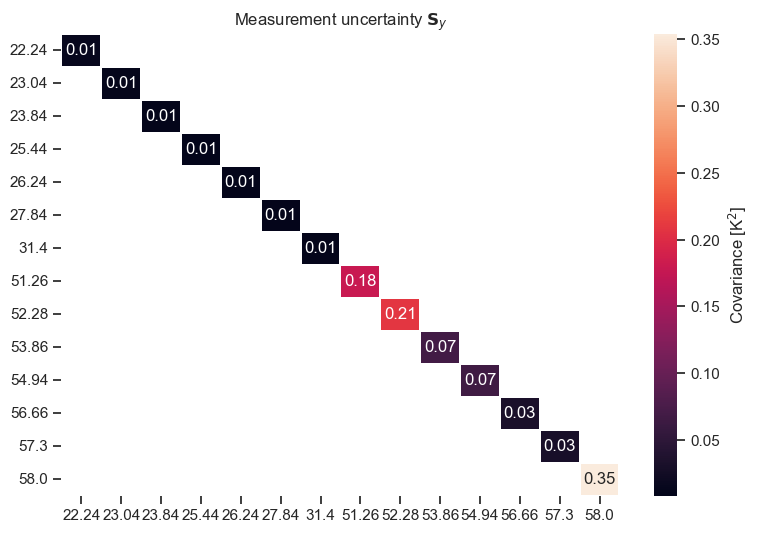

In [463]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_y.where(S_y > 0), 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [464]:
x_a = x_mean.sel(season='MAM').to_pandas()[x_vars]
S_a = x_cov.sel(season='MAM').to_pandas().loc[x_vars, x_vars]

In [465]:
singularMatrix = np.array([[1,0,0], [1,0,1e-50], [1,1e-50,0]])
np.linalg.inv(singularMatrix)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e+50,  0.e+00,  1.e+50],
       [-1.e+50,  1.e+50,  0.e+00]])

In [466]:
x_truth

state
00000_t    298.750000
00188_t    298.550000
00508_t    295.350000
00938_t    294.950000
01533_t    293.750000
02158_t    292.950000
02740_t    289.750000
03254_t    287.150000
03703_t    285.350000
03750_t    286.150000
03909_t    287.350000
04213_t    285.350000
04672_t    282.950000
05148_t    281.350000
05613_t    276.750000
06057_t    274.350000
06441_t    273.350000
06780_t    273.150000
07082_t    270.050000
07363_t    267.650000
07647_t    265.850000
07952_t    258.050000
08332_t    255.850000
08719_t    252.650000
09183_t    245.650000
09649_t    240.850000
10091_t    240.450000
10423_t    238.250000
10653_t    236.050000
10678_t    238.650000
00000_q      1.192533
00188_q      1.101862
00508_q      1.088925
00938_q      1.084781
01533_q      1.186646
02158_q      1.149625
02740_q      1.114998
03254_q      1.086430
03703_q      0.977757
03750_q      0.799304
03909_q      0.882388
04213_q      0.635029
04672_q      0.984079
05148_q      0.616792
05613_q      0.735045
0605

In [467]:
import pandas as pd

# Assuming 'series' is your pandas Series
has_nan = x_truth.isna().any()

# Print whether there are NaN values
print("Are there any NaN values in the series?", has_nan)


Are there any NaN values in the series? False


In [468]:
try:
    pyOE.invertMatrix(singularMatrix)
except Exception as err:
    traceback.print_tb(err.__traceback__)

  File "C:\Users\angsh\AppData\Local\Temp\ipykernel_17508\384370707.py", line 2, in <module>
    pyOE.invertMatrix(singularMatrix)
  File "C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py", line 1485, in invertMatrix
    raise ValueError("Found singular matrix", UserWarning)


In [469]:
forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [470]:
x_truth

state
00000_t    298.750000
00188_t    298.550000
00508_t    295.350000
00938_t    294.950000
01533_t    293.750000
02158_t    292.950000
02740_t    289.750000
03254_t    287.150000
03703_t    285.350000
03750_t    286.150000
03909_t    287.350000
04213_t    285.350000
04672_t    282.950000
05148_t    281.350000
05613_t    276.750000
06057_t    274.350000
06441_t    273.350000
06780_t    273.150000
07082_t    270.050000
07363_t    267.650000
07647_t    265.850000
07952_t    258.050000
08332_t    255.850000
08719_t    252.650000
09183_t    245.650000
09649_t    240.850000
10091_t    240.450000
10423_t    238.250000
10653_t    236.050000
10678_t    238.650000
00000_q      1.192533
00188_q      1.101862
00508_q      1.088925
00938_q      1.084781
01533_q      1.186646
02158_q      1.149625
02740_q      1.114998
03254_q      1.086430
03703_q      0.977757
03750_q      0.799304
03909_q      0.882388
04213_q      0.635029
04672_q      0.984079
05148_q      0.616792
05613_q      0.735045
0605

In [471]:
# forwardKwArgs = dict(
#     pressure=pressure.loc['SON'].values,
#     zenithAngle=0,
#     frequencies=frequencies
# )

y_obs = forwardRT(x_truth, **forwardKwArgs)
y_obs = pd.Series(y_obs, index=y_vars)
assert np.all(np.isfinite(y_obs))

In [472]:
oe_ref = pyOE.optimalEstimation(
    x_vars,       # state variable names
    x_a,          # a priori
    S_a,          # a priori uncertainty
    y_vars,       # measurement variable names
    y_obs,        # observations
    S_y,      # observation uncertainty
    forwardRT,    # forward Operator
    forwardKwArgs=forwardKwArgs,  # additional function arguments
    x_truth=x_truth,              # true profile
)


In [473]:
oe_ref.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.34 s, iteration 1, degrees of freedom: 2.21 of 60, converged (x-space):  0.002
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.51 s, iteration 2, degrees of freedom: 2.21 of 60, done.  0.000


True

In [474]:
print(oe_ref.x_op[:10])
print(oe_ref.S_op[:10])

00000_q      1.173241
00000_t    298.787256
00188_q      1.146009
00188_t    298.368112
00508_q      1.108371
00508_t    296.638309
00938_q      1.053501
00938_t    294.230051
01533_q      0.954448
01533_t    290.636543
dtype: float64
          00000_q   00000_t   00188_q   00188_t   00508_q   00508_t   00938_q  \
00000_q  0.007430  0.000584  0.007145 -0.005289  0.006898 -0.013564  0.006538   
00000_t  0.000584  0.014704  0.000011 -0.029877  0.001364  0.046810  0.001599   
00188_q  0.007145  0.000011  0.014869 -0.005678  0.012182 -0.032773  0.011145   
00188_t -0.005289 -0.029877 -0.005678  0.094447 -0.012507 -0.326950 -0.014542   
00508_q  0.006898  0.001364  0.012182 -0.012507  0.018941  0.028911  0.018588   
00508_t -0.013564  0.046810 -0.032773 -0.326950  0.028911  3.350541  0.047155   
00938_q  0.006538  0.001599  0.011145 -0.014542  0.018588  0.047155  0.038101   
00938_t -0.010408  0.060154 -0.026746 -0.425373  0.067833  3.886016  0.389085   
01533_q  0.006153  0.002717  0.00974

In [475]:
print(oe_ref.x_op_err[:10])

00000_q    0.086199
00000_t    0.121259
00188_q    0.121938
00188_t    0.307322
00508_q    0.137628
00508_t    1.830448
00938_q    0.195194
00938_t    3.972523
01533_q    0.315681
01533_t    7.413102
dtype: float64


In [476]:
print('total', oe_ref.dgf)
print(oe_ref.dgf_x[:10])

total 2.208158044135203
00000_q   -0.000564
00000_t    0.985164
00188_q    0.006100
00188_t    0.870262
00508_q    0.006043
00508_t    0.315823
00938_q    0.000737
00938_t    0.023829
01533_q    0.000041
01533_t    0.000712
dtype: float64


In [477]:
help(oe_ref)

Help on optimalEstimation in module pyOptimalEstimation.pyOEcore object:

class optimalEstimation(builtins.object)
 |  optimalEstimation(x_vars, x_a, S_a, y_vars, y_obs, S_y, forward, userJacobian=None, x_truth=None, b_vars=[], b_p=[], S_b=[[]], x_lowerLimit={}, x_upperLimit={}, useFactorInJac=False, gammaFactor=None, perturbation=0.1, disturbance=None, convergenceFactor=10, convergenceTest='x', forwardKwArgs={}, multipleForwardKwArgs=None, verbose=None)
 |  
 |  The core optimalEstimation class, which contains all required parameters.
 |  See [1]_ for an extensive introduction into Optimal Estimation theory, 
 |  [2]_ discusses this library
 |  
 |  Parameters
 |  ----------
 |  x_vars : list of str
 |      names of the elements of state vector x.
 |  x_a : pd.Series or list or np.ndarray
 |      prior information of state x.
 |  S_a : pd.DataFrame or list or np.ndarray
 |      covariance matrix of state x.
 |  y_vars : list of str
 |      names of the elements of state vector x
 |  y

C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py:1339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sp4.set_xticklabels(xlabels)


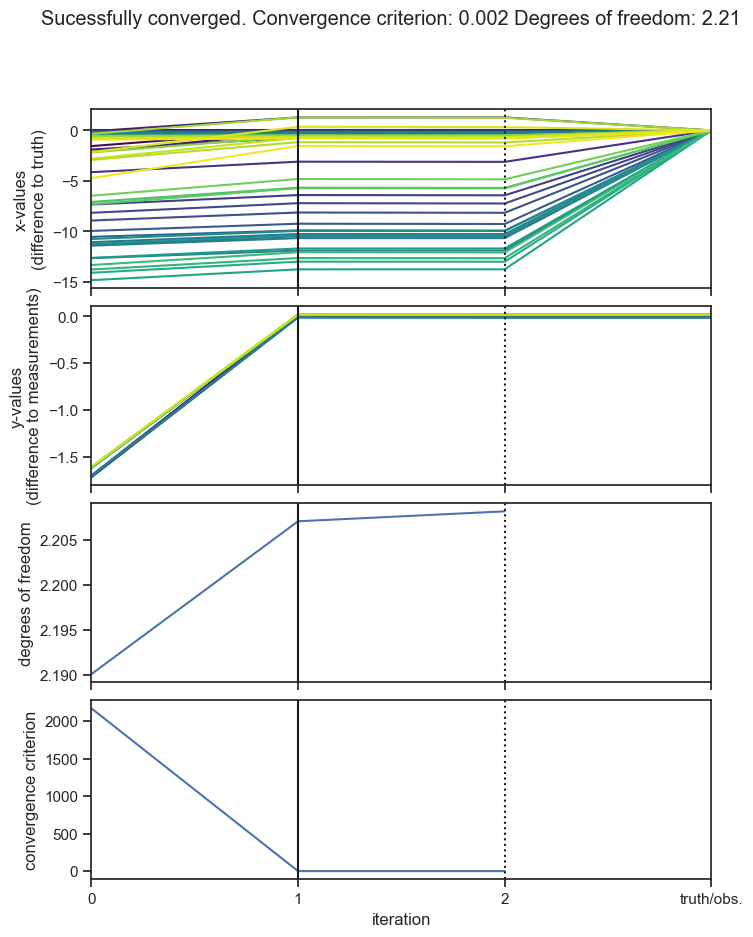

In [478]:
fig = oe_ref.plotIterations(legend=False, mode='difference')

In [479]:
oe_ref.x_op

00000_q      1.173241
00000_t    298.787256
00188_q      1.146009
00188_t    298.368112
00508_q      1.108371
00508_t    296.638309
00938_q      1.053501
00938_t    294.230051
01533_q      0.954448
01533_t    290.636543
02158_q      0.839167
02158_t    286.521276
02740_q      0.733772
02740_t    282.510615
03254_q      0.641580
03254_t    278.987725
03703_q      0.565842
03703_t    276.077194
03750_q      0.586590
03750_t    276.218481
03909_q      0.584095
03909_t    276.857182
04213_q      0.527390
04213_t    275.077735
04672_q      0.428987
04672_t    272.274822
05148_q      0.333357
05148_t    269.444832
05613_q      0.245358
05613_t    266.791599
06057_q      0.155441
06057_t    263.938532
06441_q      0.076899
06441_t    261.651910
06780_q     -0.013081
06780_t    259.384620
07082_q     -0.100437
07082_t    257.042582
07363_q     -0.173545
07363_t    254.989256
07647_q     -0.258930
07647_t    253.755745
07952_q     -0.351262
07952_t    252.353362
08332_q     -0.470610
08332_t   

Text(0.5, 1.0, '$\\mathbf{S}_{op}$ Humidity')

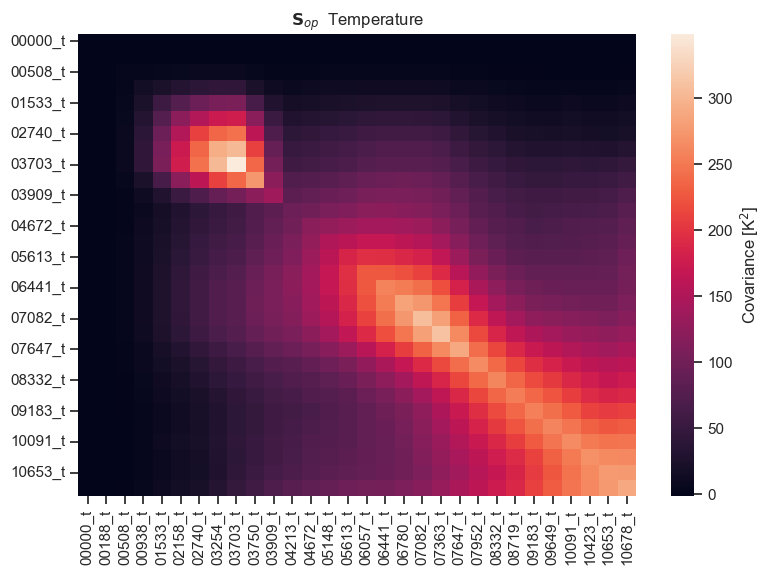

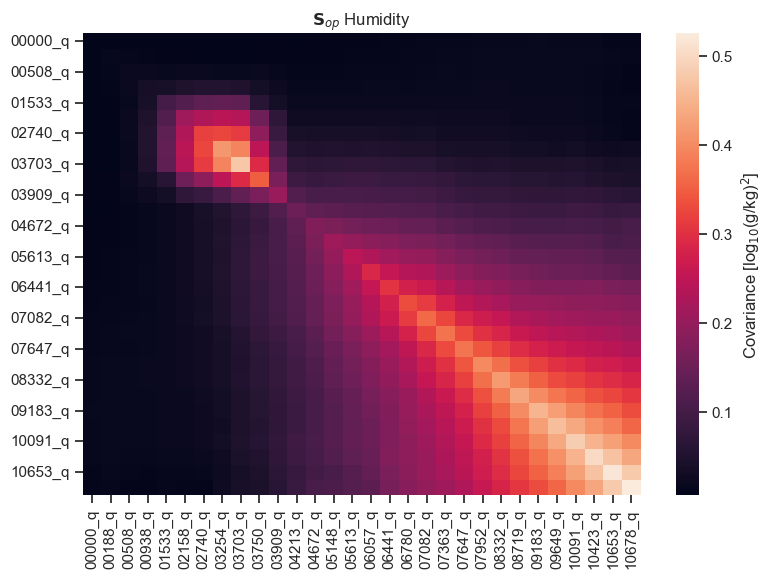

In [480]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbf{S}_{op}$  Temperature')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbf{S}_{op}$ Humidity')

In [481]:
oe_ref.x_op_err

00000_q     0.086199
00000_t     0.121259
00188_q     0.121938
00188_t     0.307322
00508_q     0.137628
00508_t     1.830448
00938_q     0.195194
00938_t     3.972523
01533_q     0.315681
01533_t     7.413102
02158_q     0.457692
02158_t    11.072657
02740_q     0.563172
02740_t    14.472555
03254_q     0.643674
03254_t    17.136520
03703_q     0.689023
03703_t    18.678186
03750_q     0.590827
03750_t    16.572877
03909_q     0.454083
03909_t    11.685066
04213_q     0.385887
04213_t     9.796985
04672_q     0.419399
04672_t    10.958607
05148_q     0.460113
05148_t    12.318374
05613_q     0.495907
05613_t    13.642727
06057_q     0.534767
06057_t    15.032337
06441_q     0.551030
06441_t    16.049844
06780_q     0.575221
06780_t    16.845515
07082_q     0.602236
07082_t    17.508298
07363_q     0.610736
07363_t    17.634695
07647_q     0.611498
07647_t    16.990327
07952_q     0.630669
07952_t    16.292451
08332_q     0.646665
08332_t    16.148054
08719_q     0.657568
08719_t    15

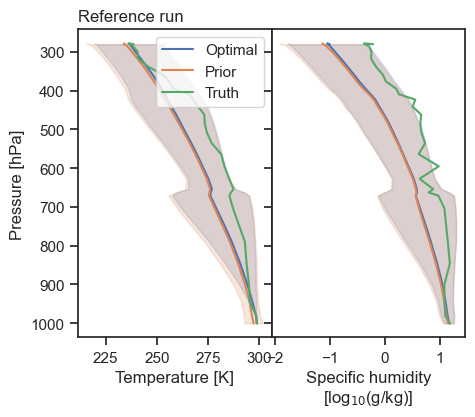

In [482]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='Reference run')

In [483]:
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_truth)

print('RMS X Temperature: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('RMS X Humidity: %g [log$_{10}$(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))
print('RMS Y %g [K]'% np.sqrt(np.mean((oe_ref.y_obs - oe_ref.y_op)**2)))

RMS X Temperature: 8.02777 [K]
RMS X Humidity: 3.6023 [log$_{10}$(g/kg)]
RMS Y 0.0138694 [K]


In [484]:
chiSquareTest = oe_ref.chiSquareTest(significance=0.05)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       


In [485]:
print('\nTests passed:\n' ,chiSquareTest[0])


Tests passed:
 chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [486]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)
# linearity, trueLinearity = oe_ref.linearityTest(significance=0.05)
# print('Linearity test passed:', linearity)


warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

In [487]:
x_a = x_mean.sel(season='MAM').to_pandas()  # as before
S_a = x_cov.sel(season='MAM')  # as before
S_a_diag = np.diag(np.diag(S_a))

In [488]:
oe_diag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a_diag,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_diag.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.35 s, iteration 1, degrees of freedom: 2.51 of 60, converged (x-space):  0.003
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.53 s, iteration 2, degrees of freedom: 2.51 of 60, done.  0.000


True

In [489]:
oe_diag.dgf, oe_ref.dgf

(2.5072847401871745, 2.208158044135203)

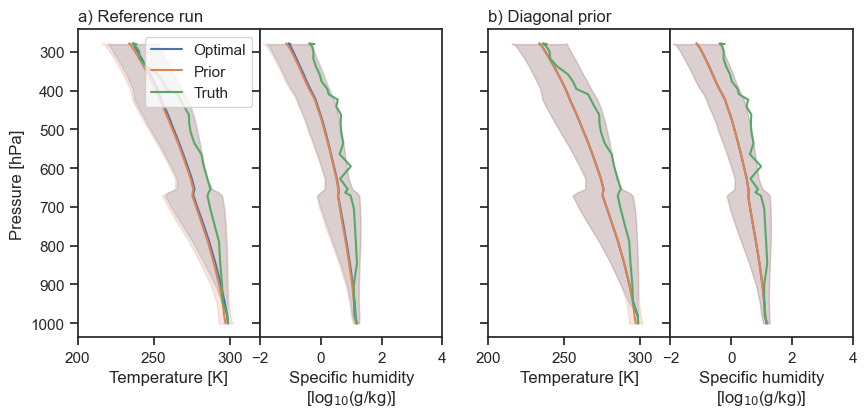

In [490]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)


In [491]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Diagonal prior:')
supporting_routines.print_mwr_rms(oe_diag)


Reference run:
RMS X Temperature: 8.02777 [K]
RMS X Humidity: 3.6023 [log$_{10}$(g/kg)]
RMS Y 0.0138694 [K]
Diagonal prior:
RMS X Temperature: 8.8616 [K]
RMS X Humidity: 3.71801 [log$_{10}$(g/kg)]
RMS Y 0.00137317 [K]


In [492]:
print(oe_diag.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [493]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_diag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Linearity test passed:  True


In [494]:
x_a = x_mean.sel(season='JJA').to_pandas()
S_a = x_cov.sel(season='JJA').to_pandas()
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [495]:
oe_sum = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_sum.doRetrieval()

0.34 s, iteration 1, degrees of freedom: 2.19 of 60, converged (x-space):  0.250


0.50 s, iteration 2, degrees of freedom: 2.19 of 60, done.  0.000


True

In [496]:
oe_ref.dgf, oe_sum.dgf

(2.208158044135203, 2.191483724925013)

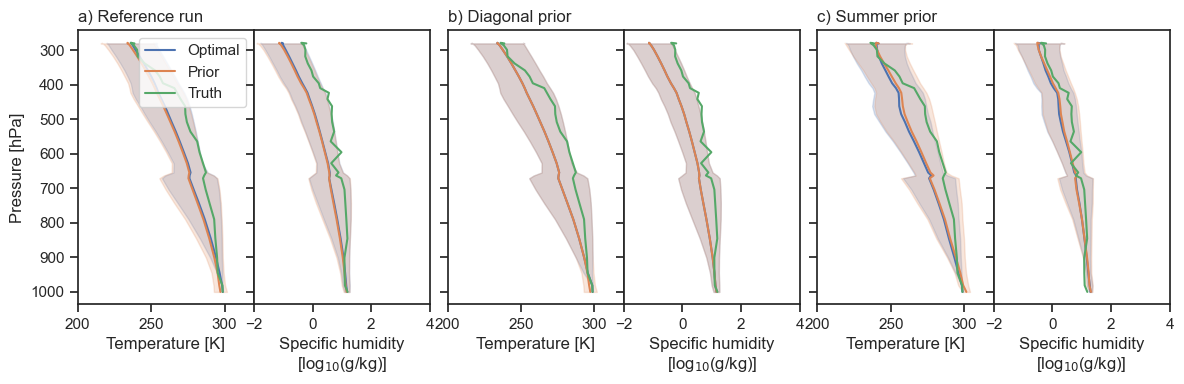

In [497]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    oe3 = oe_sum,
    h=pressure.loc['MAM'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    title3='c) Summer prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)
fig.tight_layout()
fig.savefig('Figure2.png', dpi=200)
fig.savefig('Figure2.pdf')

In [498]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Autumn prior:')
supporting_routines.print_mwr_rms(oe_sum)

Reference run:
RMS X Temperature: 8.02777 [K]
RMS X Humidity: 3.6023 [log$_{10}$(g/kg)]
RMS Y 0.0138694 [K]
Autumn prior:
RMS X Temperature: 9.62869 [K]
RMS X Humidity: 2.89221 [log$_{10}$(g/kg)]
RMS Y 0.013612 [K]


In [499]:
print(oe_sum.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [500]:
# linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_sum.linearityTest(significance=0.05)
# print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

In [501]:
S_b = pd.DataFrame(
    np.array([
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 3.0, 3.3, 1.2, 0.1, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 8.7, 9.2, 3.3, 0.3, 0.0, 0.0, 0.0],
        [0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.7, 8.2, 8.7, 3.0, 0.3, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    ]),
    index=frequencies[::-1],
    columns=frequencies)

Text(0.5, 1.0, "Model uncertainty $\\mathbf{S}_{b}$' (Cimini et al. 2018)")

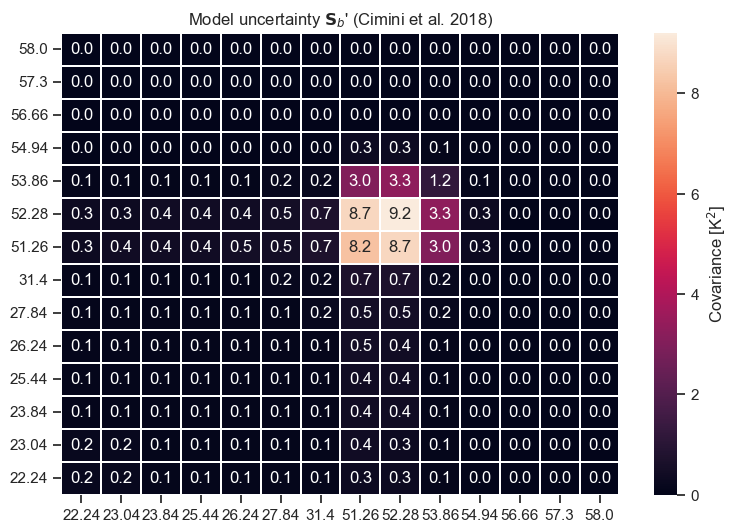

In [502]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_b, 
    annot=True, 
    linewidths=.05, 
    ax=ax, 
    fmt='.1f', 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r"Model uncertainty $\mathbf{S}_{b}$' (Cimini et al. 2018)")

In [503]:
x_a = x_mean.sel(season='MAM').to_pandas() # as for the reference run
S_a = x_cov.sel(season='MAM').to_pandas() # as for the reference run
S_e = S_y + S_b

assert (S_e.values == S_e.values.T).all()

forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_b = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_b.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.49 s, iteration 2, degrees of freedom: 1.89 of 60, done.  0.000


True

In [504]:
oe_ref.dgf, oe_b.dgf

(2.208158044135203, 1.889783777170557)

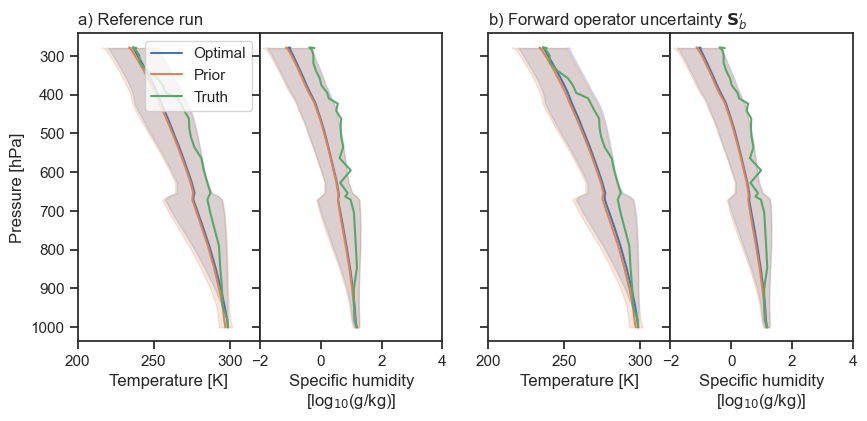

In [505]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_b,
    h=pressure.loc['MAM'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2="b) Forward operator uncertainty $\mathbf{S}_b'$",
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [506]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Concidering forward model error:')
supporting_routines.print_mwr_rms(oe_b)


Reference run:
RMS X Temperature: 8.02777 [K]
RMS X Humidity: 3.6023 [log$_{10}$(g/kg)]
RMS Y 0.0138694 [K]
Concidering forward model error:
RMS X Temperature: 7.77282 [K]
RMS X Humidity: 3.5021 [log$_{10}$(g/kg)]
RMS Y 0.0278925 [K]


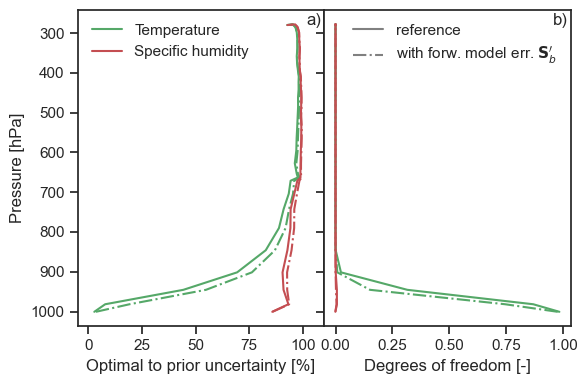

In [507]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_b, 'with forw. model err. $\mathbf{S}_b\'$',
    pressure.loc['MAM'] / 100,
)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('Figure3.png', dpi=200)
fig.savefig('Figure3.pdf')

In [508]:
((oe_b.x_op_err/oe_b.x_a_err) - (oe_ref.x_op_err/oe_ref.x_a_err)).max() * 100

11.347070102504906

In [509]:
print('Change in degrees of freedom for temperature variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[0].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[0].sum()))
print('Change in degrees of freedom for humidity variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[1].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[1].sum()))

Change in degrees of freedom for temperature variables 0.312072
Change in degrees of freedom for humidity variables 0.00630231


In [510]:
print(oe_b.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
war

In [511]:
x_a = x_mean.sel(season='MAM').to_pandas() # as reference
S_a = x_cov.sel(season='MAM').to_pandas() # as reference
S_e = S_y * 4
forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_double = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_double.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.34 s, iteration 1, degrees of freedom: 2.00 of 60, converged (x-space):  0.000
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative

True

In [512]:
S_e = S_y / 4

oe_half = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_half.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

True

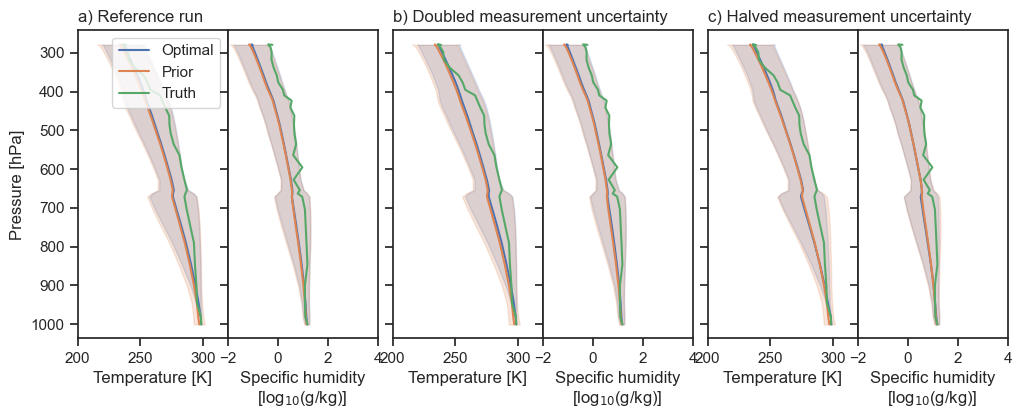

In [513]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_double,
    oe3 = oe_half,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Doubled measurement uncertainty',
    title3='c) Halved measurement uncertainty',
    xlimT = (200, 320),
    xlimH = (-2, 4),
)

In [514]:
print('### Reference run ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Doubled measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_double.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_double.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Halved measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_half.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_half.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))


### Reference run ###
Temperature RMS difference to x_a: 1.40139 [K]
Humidity RMS difference to x_a: 0.258131 [log10(g/kg)]

### Doubled measurement uncertainty ###
Temperature RMS difference to x_a: 1.6046 [K]
Humidity RMS difference to x_a: 0.350034 [log10(g/kg)]

### Halved measurement uncertainty ###
Temperature RMS difference to x_a: 1.13751 [K]
Humidity RMS difference to x_a: 0.175597 [log10(g/kg)]


Change in degrees of freedom for halved measurement uncertainties -0.333276
Change in degrees of freedom for doubled measurement uncertainties 0.206794


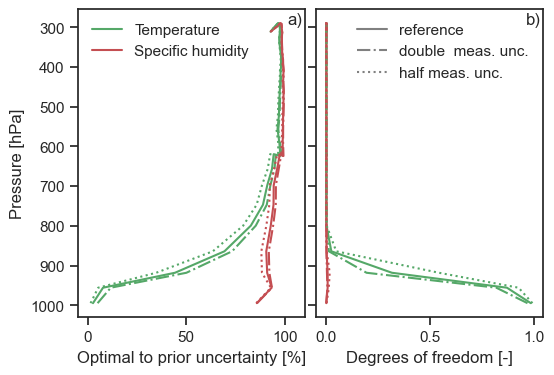

In [515]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_double, 'double  meas. unc.',
    pressure.loc['JJA'] / 100,
    oe3=oe_half, label3 = 'half meas. unc.'
)

print('Change in degrees of freedom for halved measurement uncertainties %g' %
      (oe_ref.dgf - oe_half.dgf))
print('Change in degrees of freedom for doubled measurement uncertainties %g' %
      (oe_ref.dgf - oe_double.dgf))


In [516]:
print(oe_double.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_double.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
war

In [517]:
print(oe_half.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_half.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 5 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption co

Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$ including non-diagonal elements.')

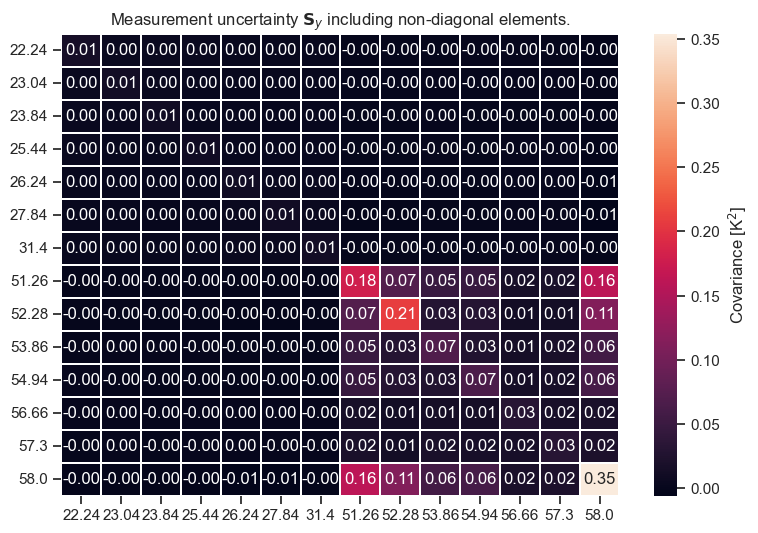

In [518]:
S_y_nondiag = np.array(
    [[
        1.4464e-02, 3.1175e-03, 3.2584e-03, 2.7590e-03, 2.1494e-03, 1.8121e-03,
        2.3444e-03, -2.8253e-03, -1.1941e-03, -7.1487e-04, -7.1019e-05,
        -1.3676e-04, -3.0526e-04, -3.8639e-03
    ],
     [
         3.1175e-03, 1.1803e-02, 2.5663e-03, 2.1457e-03, 1.5946e-03,
         1.6916e-03, 1.8975e-03, -7.3124e-04, -4.7555e-04, 1.8126e-04,
         -8.1855e-04, 4.6114e-04, 3.1963e-06, -2.5867e-03
     ],
     [
         3.2584e-03, 2.5663e-03, 1.0841e-02, 2.3239e-03, 1.1311e-03,
         1.1062e-03, 1.5767e-03, -6.4790e-04, -1.3201e-03, 1.7669e-04,
         -1.0165e-03, -4.5220e-04, -5.8443e-04, -1.9019e-03
     ],
     [
         2.7590e-03, 2.1457e-03, 2.3239e-03, 8.4360e-03, 1.3579e-03,
         1.5264e-03, 1.4780e-03, -8.7548e-04, -1.5626e-03, -1.7332e-04,
         -4.6437e-04, -1.8432e-04, -1.7265e-04, -3.8433e-03
     ],
     [
         2.1494e-03, 1.5946e-03, 1.1311e-03, 1.3579e-03, 1.0352e-02,
         3.3218e-03, 3.1755e-03, -2.2734e-03, -2.3389e-03, -1.2198e-03,
         -7.2950e-04, 2.0710e-04, 2.5822e-04, -5.9091e-03
     ],
     [
         1.8121e-03, 1.6916e-03, 1.1062e-03, 1.5264e-03, 3.3218e-03,
         1.0172e-02, 3.2801e-03, -2.0768e-03, -2.1563e-03, -4.6483e-04,
         -1.6465e-03, 9.4358e-05, -2.8649e-04, -5.4612e-03
     ],
     [
         2.3444e-03, 1.8975e-03, 1.5767e-03, 1.4780e-03, 3.1755e-03,
         3.2801e-03, 1.1026e-02, -3.1658e-04, -1.1692e-03, -7.5206e-04,
         -1.0920e-03, -3.7627e-05, -2.0978e-04, -1.7690e-03
     ],
     [
         -2.8253e-03, -7.3124e-04, -6.4790e-04, -8.7548e-04, -2.2734e-03,
         -2.0768e-03, -3.1658e-04, 1.7896e-01, 7.2248e-02, 4.8262e-02,
         4.6481e-02, 1.6283e-02, 1.8456e-02, 1.6027e-01
     ],
     [
         -1.1941e-03, -4.7555e-04, -1.3201e-03, -1.5626e-03, -2.3389e-03,
         -2.1563e-03, -1.1692e-03, 7.2248e-02, 2.0847e-01, 2.8595e-02,
         2.9832e-02, 1.1226e-02, 1.3614e-02, 1.1240e-01
     ],
     [
         -7.1487e-04, 1.8126e-04, 1.7669e-04, -1.7332e-04, -1.2198e-03,
         -4.6483e-04, -7.5206e-04, 4.8262e-02, 2.8595e-02, 6.9126e-02,
         2.5361e-02, 1.3994e-02, 1.8141e-02, 5.6810e-02
     ],
     [
         -7.1019e-05, -8.1855e-04, -1.0165e-03, -4.6437e-04, -7.2950e-04,
         -1.6465e-03, -1.0920e-03, 4.6481e-02, 2.9832e-02, 2.5361e-02,
         6.5223e-02, 1.3962e-02, 1.6982e-02, 6.0963e-02
     ],
     [
         -1.3676e-04, 4.6114e-04, -4.5220e-04, -1.8432e-04, 2.0710e-04,
         9.4358e-05, -3.7627e-05, 1.6283e-02, 1.1226e-02, 1.3994e-02,
         1.3962e-02, 3.1456e-02, 1.7948e-02, 1.8197e-02
     ],
     [
         -3.0526e-04, 3.1963e-06, -5.8443e-04, -1.7265e-04, 2.5822e-04,
         -2.8649e-04, -2.0978e-04, 1.8456e-02, 1.3614e-02, 1.8141e-02,
         1.6982e-02, 1.7948e-02, 3.0822e-02, 2.1850e-02
     ],
     [
         -3.8639e-03, -2.5867e-03, -1.9019e-03, -3.8433e-03, -5.9091e-03,
         -5.4612e-03, -1.7690e-03, 1.6027e-01, 1.1240e-01, 5.6810e-02,
         6.0963e-02, 1.8197e-02, 2.1850e-02, 3.5390e-01
     ]])

S_y_nondiag = pd.DataFrame(
    S_y_nondiag,
    index=y_vars,
    columns=y_vars,
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_y_nondiag, annot=True, fmt='.2f', ax=ax, linewidths=.05, cbar_kws={'label':'Covariance [K$^2$]'})

ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$ including non-diagonal elements.')



In [519]:
x_a = x_mean.sel(season='MAM').to_pandas()[x_vars] # as reference run
S_a = x_cov.sel(season='MAM').to_pandas().loc[x_vars, x_vars] # as reference run
S_e = S_y_nondiag

forwardKwArgs = dict(
    pressure=pressure.loc['MAM'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_nondiag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_nondiag.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.32 s, iteration 1, degrees of freedom: 2.17 of 60, converged (x-space):  0.001
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative

True

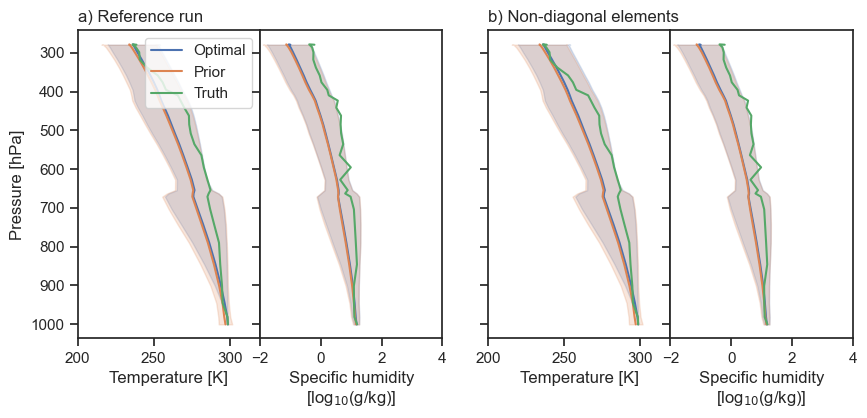

In [520]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_nondiag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Non-diagonal elements',
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [521]:
oe_nondiag.dgf - oe_ref.dgf

-0.04138331541592022

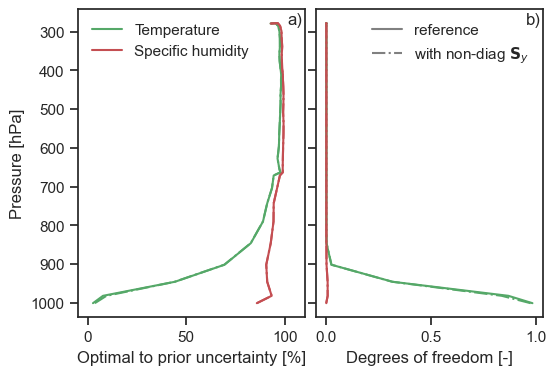

In [522]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_nondiag, 'with non-diag $\mathbf{S}_y$',
    pressure.loc['MAM'] / 100,
)

In [523]:
print(oe_nondiag.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_nondiag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption co

In [524]:
x_a = x_mean.sel(season='MAM').to_pandas()  # as reference run
S_a = x_cov.sel(season='MAM').to_pandas()   # as reference run

In [525]:
oe_testy = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
    convergenceTest='y'
)
oe_testy.doRetrieval()

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.33 s, iteration 1, degrees of freedom: 2.21 of 60, not converged (y-space):  22.261
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, neg

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
0.64 s, iteration 3, degrees of freedom: 2.21 of 60, done.  0.000


True

In [526]:
oe_testy.dgf, oe_ref.dgf

(2.2081667043273323, 2.208158044135203)

In [527]:
print('Reference run with test in x-space:')
supporting_routines.print_mwr_rms(oe_ref)
print('Test in y-space:')
supporting_routines.print_mwr_rms(oe_testy)


Reference run with test in x-space:
RMS X Temperature: 8.02777 [K]
RMS X Humidity: 3.6023 [log$_{10}$(g/kg)]
RMS Y 0.0138694 [K]
Test in y-space:
RMS X Temperature: 8.02868 [K]
RMS X Humidity: 3.60268 [log$_{10}$(g/kg)]
RMS Y 0.0138598 [K]


In [528]:
print(oe_testy.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 60. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [529]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_testy.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negativ

warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
warning, negative absorption coefficient
Linearity test passed:  True
